# Read Directly from IIASA Data Resources

IIASA's new [scenario explorer](https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/workspaces) is not only a great resource on its own, but it also allows the underlying datasets to be directly queried. `pyam`  takes advantage of this ability to allow you to easily pull data and work with it.

In [1]:
import pyam
from pyam.iiasa import valid_connection_names

<IPython.core.display.Javascript object>

There are currently not many available data sources, but more will be added with time

In [2]:
valid_connection_names()

['iamc15']

In this example, we will be pulling data from the Special Report on 1.5C explorer. This can be done in a number of ways, for example

```
pyam.read_iiasa('iamc15')
pyam.read_iiasa_iamc15()
```

However, this would pull all available data. It is also possible to query specific subsets of data in a manner similar to `pyam.IamDataFrame.filter()`. We'll do that to keep it manageable.

In [3]:
df = pyam.read_iiasa_iamc15(
    model='*', scenario='*',
    variable=['Emissions|CO2', 'Primary Energy|Coal', 
              'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED'], 
    region='World'
)

INFO:root:You are connected to the iamc15 scenario explorer. Please cite as:

D. Huppmann, E. Kriegler, V. Krey, K. Riahi, J. Rogelj, S.K. Rose, J. Weyant, et al., IAMC 1.5C Scenario Explorer and Data hosted by IIASA. IIASA & IAMC, 2018. doi: 10.22022/SR15/08-2018.15429, url: data.ene.iiasa.ac.at/iamc-1.5c-explorer


In [4]:
df.categorize(
    'Temperature', 'Below 1.5C',
    criteria={'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED': 
              {'up': 1.5, 'year': 2100}},
    color='cornflowerblue'
)

INFO:root:90 scenarios categorized as `Temperature: Below 1.5C`


In [5]:
df.categorize(
    'Temperature', 'Below 2C',
    criteria={'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED': 
              {'lo': 1.5, 'up': 2, 'year': 2100}},
    color='forestgreen'
)

INFO:root:135 scenarios categorized as `Temperature: Below 2C`


In [6]:
df.categorize(
    'Temperature', 'Above 2C',
    criteria={'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED': 
              {'lo': 2, 'year': 2100}},
    color='magenta'
)

INFO:root:186 scenarios categorized as `Temperature: Above 2C`


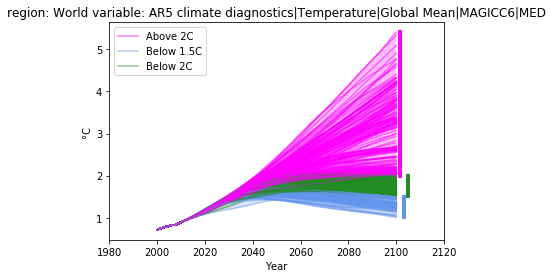

In [7]:
(df
 .filter(variable='*Temperature*')
 .line_plot(color='Temperature', legend=True, 
            alpha=0.5, fill_between=True, 
            final_ranges=dict(linewidth=4))
)

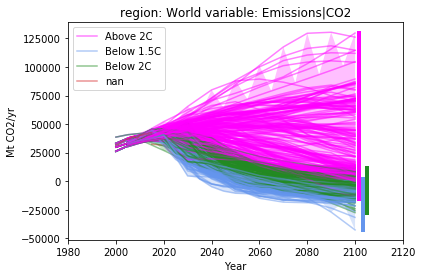

In [27]:
(df
 .filter(variable='*CO2*')
 .line_plot(color='Temperature', legend=True, 
            alpha=0.5, fill_between=True, 
            final_ranges=dict(linewidth=4))
)

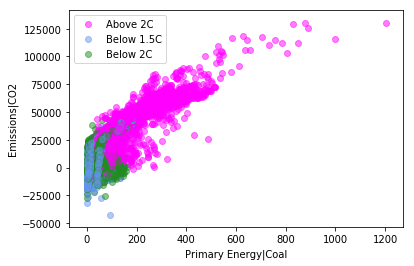

In [26]:
(df
 .filter(region='World')
 .scatter(x='Primary Energy|Coal', y='Emissions|CO2', 
          color='Temperature', alpha=0.5, legend=True)
)

Here we pulled out all results for model(s) that start with 'MESSAGEix' that are in the 'World' region and associated with the two named variables.

Let's plot CO2 emissions.

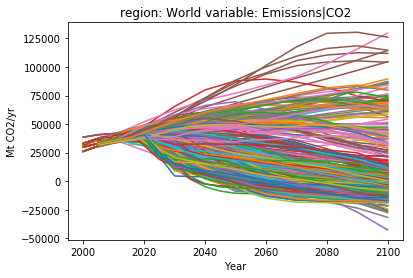

In [10]:
ax = df.filter(variable='Emissions|CO2').line_plot(
    color='scenario', 
    legend=False
)

And now continue doing all of your analysis!

## Exploring the Data Source

If you're interested in what data is actually in the data source, you can use `pyam.iiasa.Connection` to do so.

In [12]:
conn = pyam.iiasa.Connection('iamc15')

INFO:root:You are connected to the iamc15 scenario explorer. Please cite as:

D. Huppmann, E. Kriegler, V. Krey, K. Riahi, J. Rogelj, S.K. Rose, J. Weyant, et al., IAMC 1.5C Scenario Explorer and Data hosted by IIASA. IIASA & IAMC, 2018. doi: 10.22022/SR15/08-2018.15429, url: data.ene.iiasa.ac.at/iamc-1.5c-explorer


The `conn` object has a number of useful functions for listing what's in the dataset. A few of them are shown below.

In [13]:
conn.models().head()

0        AIM/CGE 2.0
1        AIM/CGE 2.1
2      C-ROADS-5.005
3           GCAM 4.2
4    GENeSYS-MOD 1.0
Name: model, dtype: object

In [14]:
conn.scenarios().head()

0    ADVANCE_2020_1.5C-2100
1        ADVANCE_2020_Med2C
2         ADVANCE_2020_WB2C
3        ADVANCE_2030_Med2C
4    ADVANCE_2030_Price1.5C
Name: scenario, dtype: object

In [15]:
[x for x in conn.variables() if 'MAGIC' in x]

['AR5 climate diagnostics|Concentration|CO2|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|Direct|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|Total|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|CH4|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|CO2|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|F-Gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Kyoto Gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Montreal Protocol (orig.) gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|N2O|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Tropospheric Ozone|MAGICC6|MED',
 'AR5 climate diagnostics|Temperature|Exceedance Probability|1.0 °C|MAGICC6',
 'AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6',
 'AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6',
 'AR5 climate diagnostics|Temperature|Exceedance Probability

In [16]:
conn.regions().head()

0          World
1         R5ASIA
2          R5LAM
3          R5MAF
4    R5OECD90+EU
Name: region, dtype: object

You can directly query the the `conn`, which will give you a `pd.DataFrame`

In [17]:
df = conn.query(
    model='MESSAGEix*', 
    variable=['Emissions|CO2', 'Primary Energy|Coal'], 
    region='World'
)
df.head()

,model,region,runId,scenario,time,unit,value,variable,version,year
0,MESSAGEix-GLOBIOM 1.0,World,238,CD-LINKS_INDCi,-1,Mt CO2/yr,31667.90819,Emissions|CO2,1,2000
1,MESSAGEix-GLOBIOM 1.0,World,238,CD-LINKS_INDCi,-1,Mt CO2/yr,35933.06970,Emissions|CO2,1,2005
2,MESSAGEix-GLOBIOM 1.0,World,238,CD-LINKS_INDCi,-1,Mt CO2/yr,38542.01816,Emissions|CO2,1,2010
3,MESSAGEix-GLOBIOM 1.0,World,238,CD-LINKS_INDCi,-1,Mt CO2/yr,39615.22255,Emissions|CO2,1,2020
4,MESSAGEix-GLOBIOM 1.0,World,238,CD-LINKS_INDCi,-1,Mt CO2/yr,40671.28065,Emissions|CO2,1,2030


And you can easily turn this into a `pyam.IamDataFrame` to continue your analysis.

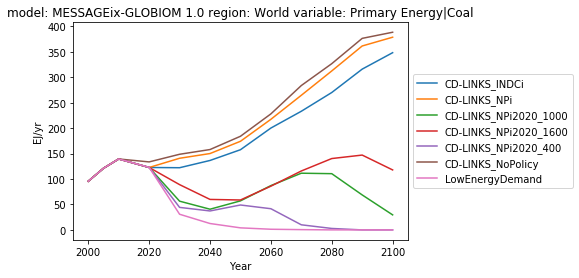

In [18]:
df = pyam.IamDataFrame(df)
ax = df.filter(variable='Primary Energy|Coal').line_plot(
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)